In [1]:
import os
import gc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from collections import Counter
from sklearn import tree

In [2]:
# Data Loading (수술 時 사망 데이터)
data = pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [3]:
data

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,0,1090,43,66.679,0,1,0,100,0,1,...,1,1,3,0,504,353,660,1,870,782
1,1,794,31,73.030,0,1,0,100,0,1,...,1,1,3,0,244,225,106,1,708,699
2,0,957,41,66.226,0,1,1,100,0,1,...,1,1,3,0,401,366,453,1,889,720
3,1,188,35,78.019,0,1,0,100,0,1,...,1,1,3,0,221,132,-1,0,221,759
4,1,308,40,83.009,0,1,0,100,0,1,...,1,1,3,1,150,90,20,1,1730,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0,1097,24,71.000,1,0,0,100,0,1,...,1,1,2,0,364,475,734,1,770,802
528,1,154,21,52.300,1,0,0,90,0,1,...,1,1,2,0,415,181,84,1,949,666
529,1,588,16,63.000,1,0,0,100,0,1,...,1,1,3,0,299,214,124,1,546,471
530,0,395,17,102.967,1,0,0,100,0,1,...,1,1,3,0,373,218,-1,0,1759,1030


In [4]:
data.shape

(532, 23)

In [5]:
data.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [6]:
# Label Balace Check - Imbalance
Counter(data['censor'])
# f1 score를 봐야한다, 5:5면 acc만 봐도 된다

Counter({0: 351, 1: 181})

In [7]:
# X's & Y Split
Y = data['censor']
X = data.drop(columns=['censor'])

In [8]:
X.shape

(532, 22)

In [9]:
Y.shape

(532,)

In [10]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2023)
print(">>>> # of Train data : {}".format(len(train_idx)))
print(">>>> # of valid data : {}".format(len(valid_idx)))
print(">>>> # of Train data Y : {}".format(Counter(Y.iloc[train_idx])))
print(">>>> # of valid data Y : {}".format(Counter(Y.iloc[valid_idx])))

>>>> # of Train data : 372
>>>> # of valid data : 160
>>>> # of Train data Y : Counter({0: 250, 1: 122})
>>>> # of valid data Y : Counter({0: 101, 1: 59})


In [11]:
# Depth 조절 Decision Tree
for i in range(2,11,1):
    print(">>>> Depth {}".format(i))

    model = DecisionTreeClassifier(max_depth=i, criterion='gini')
    model.fit(X.iloc[train_idx], Y.iloc[train_idx])

    # Train Acc
    y_pre_train = model.predict(X.iloc[train_idx])
    cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
    print("Train Confusion Matrix")
    print(cm_train)
    print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
    print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

    # Test Acc
    y_pre_test = model.predict(X.iloc[valid_idx])
    cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
    print("Train Confusion Matrix")
    print(cm_test)
    print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
    print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
    print("-----------------------------------------------------------------------")
    print("-----------------------------------------------------------------------")

>>>> Depth 2
Train Confusion Matrix
[[241   9]
 [ 44  78]]
Train Acc : 0.8575268817204301
Train F1-Score : 0.7464114832535885
Train Confusion Matrix
[[97  4]
 [26 33]]
TesT Acc : 0.8125
Test F1-Score : 0.6875
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 3
Train Confusion Matrix
[[228  22]
 [ 18 104]]
Train Acc : 0.8924731182795699
Train F1-Score : 0.8387096774193549
Train Confusion Matrix
[[87 14]
 [13 46]]
TesT Acc : 0.83125
Test F1-Score : 0.773109243697479
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>>> Depth 4
Train Confusion Matrix
[[227  23]
 [ 10 112]]
Train Acc : 0.9112903225806451
Train F1-Score : 0.8715953307392996
Train Confusion Matrix
[[90 11]
 [11 48]]
TesT Acc : 0.8625
Test F1-Score : 0.8135593220338984
-------------------------------------------------------------

In [12]:
# Depth가 깊어질 수록 정확도는 높게 나오지만 해석력에 대한 가독성을 위해 Depth 5를 선택함
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(X.iloc[train_idx], Y.iloc[train_idx])

DecisionTreeClassifier(max_depth=4)

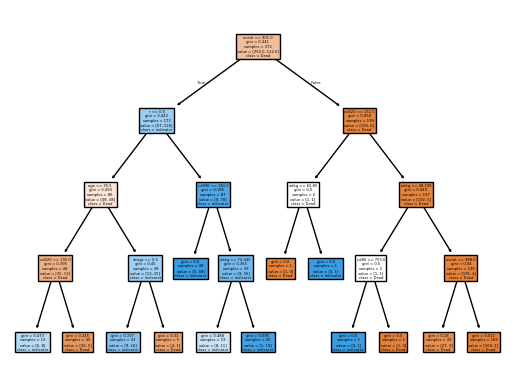

In [13]:
# Creating the tree plot
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names = ['Dead', 'indicator'])
plt.rcParams['figure.figsize'] = [30,10]

In [14]:
# RandomForest Hyperparameter
estimators = [10, 30, 40, 50, 60]
depth = [4 , 5, 10, 15]

# Modeling
save_est = []
save_dep = []
f1_score_ = []

cnt = 0
for est in estimators:
    for dep in depth:
        print(">>> {} <<<".format(cnt))
        cnt += 1
        print("Number of Estimators : {}, Max Depth : {}".format(est, dep))
        
        model = RandomForestClassifier(n_estimators=est, max_depth=dep, random_state=119,
                                       criterion='gini', max_features='sqrt', 
                                       bootstrap=True, oob_score=True) # if you use "oob_score=True", get long time for training
        model.fit(X.iloc[train_idx], Y.iloc[train_idx])

        # Train Acc
        y_pre_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
        print("Train Confusion Matrix")
        print(cm_train)
        print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
        print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

        # Test Acc
        y_pre_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
        print("Test Confusion Matrix")
        print(cm_test)
        print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
        print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
        print("-----------------------------------------------------------------------")
        print("-----------------------------------------------------------------------")
        save_est.append(est)
        save_dep.append(dep)
        f1_score_.append(f1_score(Y.iloc[valid_idx], y_pre_test))

>>> 0 <<<
Number of Estimators : 10, Max Depth : 4
Train Confusion Matrix
[[242   8]
 [ 29  93]]
Train Acc : 0.9005376344086021
Train F1-Score : 0.8340807174887892
Test Confusion Matrix
[[93  8]
 [26 33]]
TesT Acc : 0.7875
Test F1-Score : 0.66
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 1 <<<
Number of Estimators : 10, Max Depth : 5
Train Confusion Matrix
[[243   7]
 [ 14 108]]
Train Acc : 0.9435483870967742
Train F1-Score : 0.9113924050632911
Test Confusion Matrix
[[90 11]
 [23 36]]
TesT Acc : 0.7875
Test F1-Score : 0.6792452830188679
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 2 <<<
Number of Estimators : 10, Max Depth : 10
Train Confusion Matrix
[[249   1]
 [  3 119]]
Train Acc : 0.989247311827957
Train F1-Score : 0.9834710743801653
Test Confusion Matrix
[[93  8]
 [23 36]]
TesT 

In [15]:
f1_score_

[0.66,
 0.6792452830188679,
 0.6990291262135923,
 0.6391752577319587,
 0.7592592592592593,
 0.7592592592592593,
 0.8141592920353983,
 0.8035714285714286,
 0.8035714285714286,
 0.7592592592592593,
 0.8245614035087719,
 0.8141592920353983,
 0.7857142857142857,
 0.7706422018348624,
 0.8034188034188035,
 0.8,
 0.7857142857142857,
 0.7289719626168224,
 0.7966101694915254,
 0.782608695652174]

In [16]:
# Best Model
best_model = RandomForestClassifier(n_estimators=save_est[np.argmax(f1_score_)], max_depth=save_dep[np.argmax(f1_score_)], random_state=119,
                               criterion='gini', max_features='sqrt', 
                               bootstrap=True, oob_score=False) # if you use "oob_score=True", get long time for training
best_model.fit(X.iloc[train_idx], Y.iloc[train_idx])

RandomForestClassifier(max_depth=10, n_estimators=40, random_state=119)

In [17]:
# Train Acc
y_pre_train = best_model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
print("Train Confusion Matrix")
print(cm_train)
print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

# Test Acc
y_pre_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
print("Test Confusion Matrix")
print(cm_test)
print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum())) 
print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))

Train Confusion Matrix
[[250   0]
 [  0 122]]
Train Acc : 1.0
Train F1-Score : 1.0
Test Confusion Matrix
[[93  8]
 [12 47]]
TesT Acc : 0.875
Test F1-Score : 0.8245614035087719


In [18]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.325071    event
1   0.116611    cd420
2   0.080297    cd496
3   0.068333     cd80
4   0.066404     wtkg
5   0.064655    cd820
6   0.062691     cd40
7   0.054047      age
8   0.047875  preanti
9   0.036185        r
10  0.013194   karnof
11  0.011671    strat
12  0.011409     race
13  0.006760    drugs
14  0.006678   gender
15  0.006291     hemo
16  0.006121     homo
17  0.005438  symptom
18  0.005390      z30
19  0.004878     str2
20  0.000000   zprior
21  0.000000   oprior


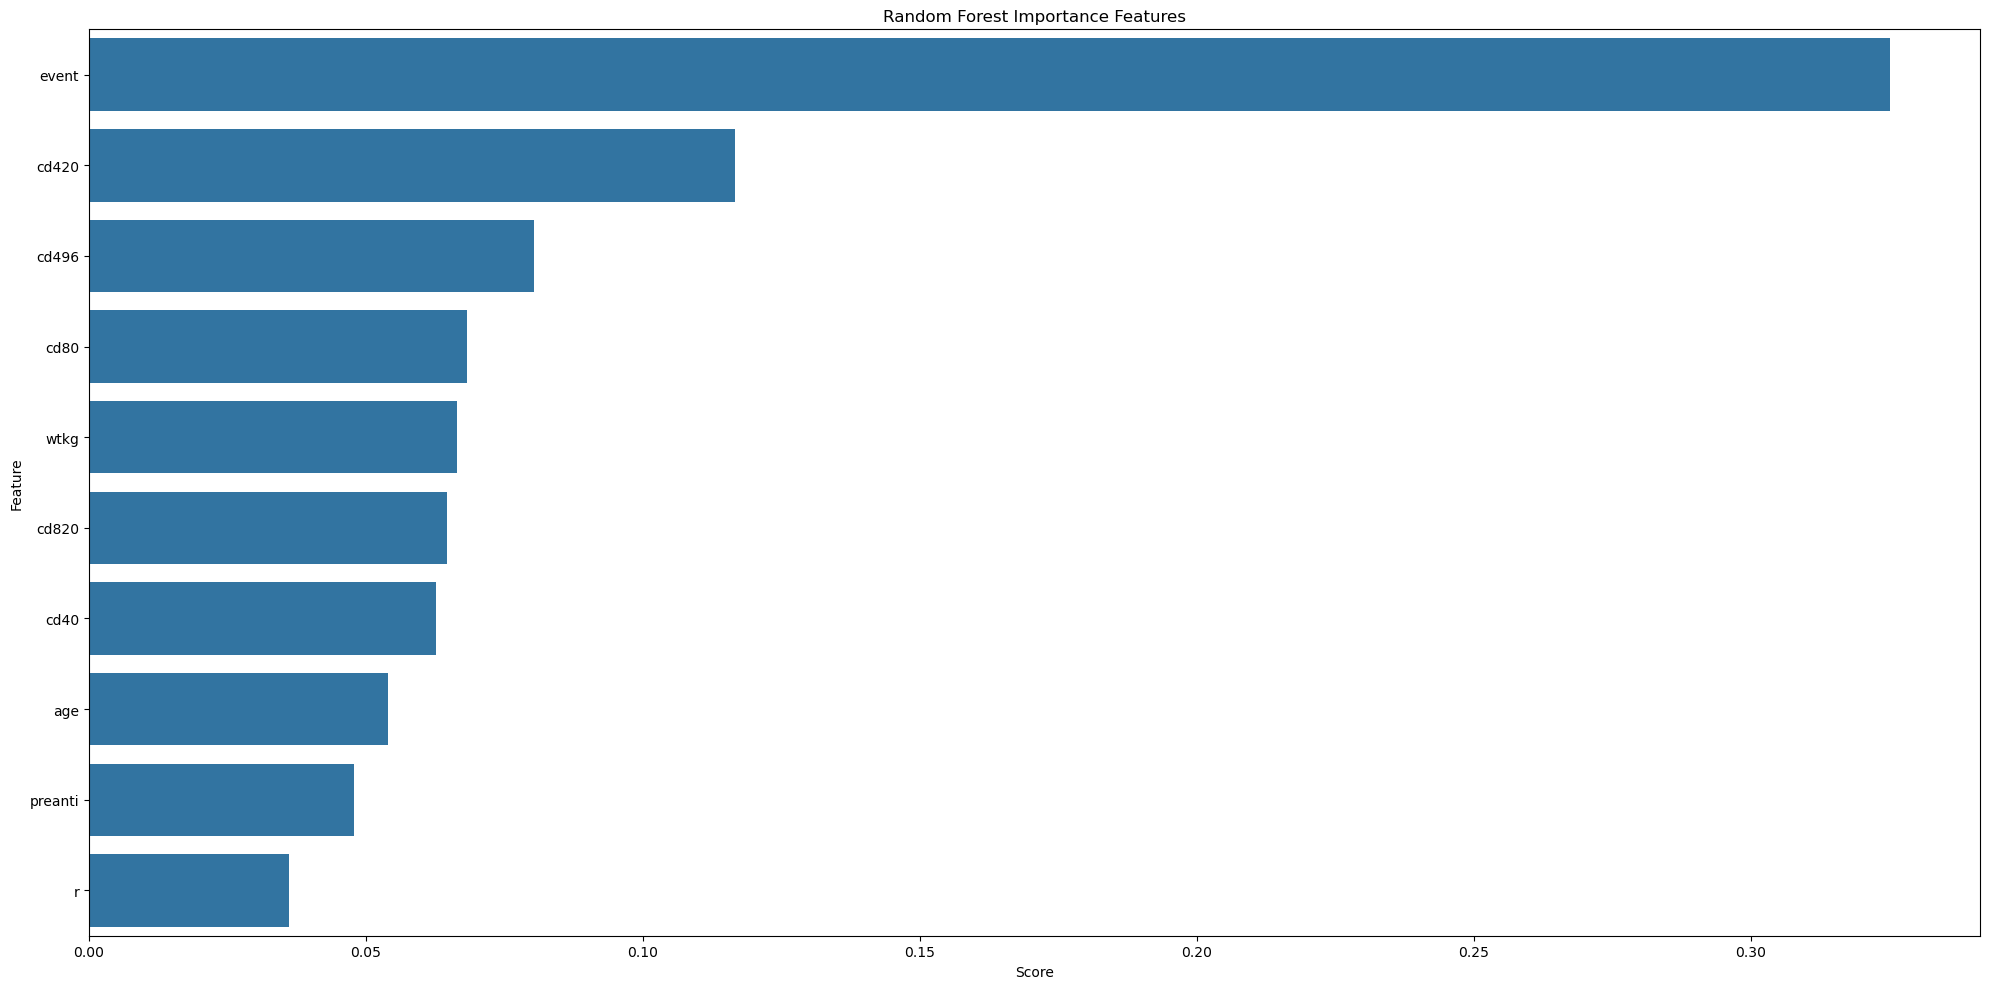

In [19]:
# Importance Score Top 10
feature_map_20 = feature_map.iloc[:10]
plt.figure(figsize=(20, 10))
sns.barplot(x="Score", y="Feature", data=feature_map_20.sort_values(by="Score", ascending=False), errwidth=40)
plt.title('Random Forest Importance Features')
plt.tight_layout()
plt.show()

In [20]:
feature_map_20

,Score,Feature
0,0.325071,event
1,0.116611,cd420
2,0.080297,cd496
3,0.068333,cd80
4,0.066404,wtkg
5,0.064655,cd820
6,0.062691,cd40
7,0.054047,age
8,0.047875,preanti
9,0.036185,r
